In [1]:
!pip3 install -Uqq fastbook
import fastbook
fastbook.setup_book()

/home/jack/anaconda3/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
frames = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label)
path = 'data'

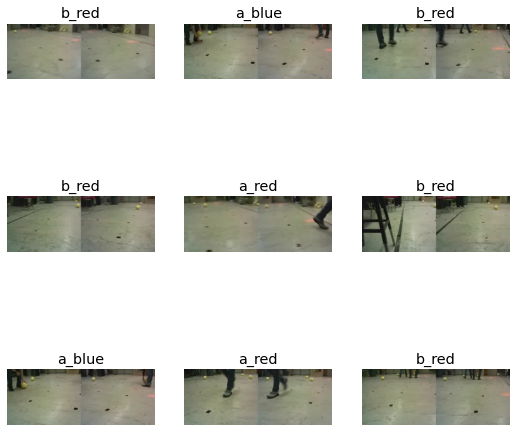

In [7]:
dls = frames.dataloaders(path)
dls.valid.show_batch(max_n=9, nrows=3)

In [ ]:
frames = frames.new(batch_tfms=aug_transforms(mult=2))
dls = frames.dataloaders(path)
dls.train.show_batch(max_n=9, nrows=3, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(9, n_rows=3)

In [ ]:
learn.export()